# Árbol de decisión

Según el siguiente árbol de decisión, analice y responda:

![Obama-Clinton decision tree](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/obama_clinton_tree.jpg)

## 1.1 ¿Qué son las observaciones? ¿Cuántas observaciones hay?


Las observaciones son condados de Estados unidos, y hay exactamente 2241 contados

In [ ]:
383+70+704+89+185+36+182+79+52+25+201+83+56+35+48+13

2241

## 1.2 ¿Cuál es la variable de respuesta?


La variable respuesta es el ganador en base a la cantidad de condados que votarian por el

## 1.3 ¿Cuáles son las características?¿Cuál es la característica más predictiva?


La caracteristica mas predictiva es el porcentaje de personas negras del condado, separando a partir del 20%. Todas las caracteristicas son:  
- Porcentaje de personas negras
- Porcentaje de personas graduadas en la secundaria 
- Ubicacion del condado
- Porcentaje de personas pobres en el año 2000
- Densidad de la poblacion
- Opinion general sobre la victoria de bush sobre Kerry


## 1.4 ¿Cuál es la predicción de clase para el siguiente condado con los siguientes datos: 15% de afroamericanos, 90% de tasa de graduación en la escuela secundaria, ubicado en el Sur, alta pobreza, alta densidad de población?


Para un condado con esas caracteristicas, se sabe que 185 votan por obama y 36 por clinton, por lo que la moda es el voto por obama. En ese condado se predice que gana obama

## 1.5 ¿Cuál es el chance predicha para ese mismo condado anteriormente descrito?

El chance de predecir que ganara obaba es de 5.16, lo que significa que obama tiene 5 veces mas probabilidades de ganar en dichos condados que clinton 

In [ ]:
186/36

5.166666666666667

## SVM


Para esta tarea consideramos un conjunto de observaciones sobre una serie de variedades de vino tinto y blanco que implican sus propiedades químicas y su clasificación por parte de los catadores. La industria del vino ha experimentado un gran crecimiento en los últimos tiempos debido al aumento del consumo social. El precio del vino depende de un concepto bastante abstracto de apreciación del vino por parte de los catadores, cuya opinión puede tener un alto grado de variabilidad. El precio del vino depende en cierta medida de este factor tan volátil. Otro factor clave en la certificación y evaluación de la calidad del vino son las pruebas fisicoquímicas, que se realizan en laboratorio y tienen en cuenta factores como la acidez, el nivel de pH, la presencia de azúcar y otras propiedades químicas. Para el mercado del vino, sería interesante que la calidad humana de la cata pudiera relacionarse con las propiedades químicas del vino para que el proceso de certificación y evaluación de la calidad estuviera más controlado.

Se dispone de dos conjuntos de datos, uno de los cuales se refiere al vino tinto y cuenta con 1.599 variedades diferentes, y el otro, al vino blanco, con 4.898 variedades. Todos los vinos se producen en una zona concreta de Portugal. Se recogen datos sobre 12 propiedades diferentes de los vinos, una de las cuales es la calidad, basada en datos sensoriales, y el resto son propiedades químicas de los vinos, como la densidad, la acidez, el contenido de alcohol, etc. Todas las propiedades químicas de los vinos son variables continuas. La calidad es una variable ordinal con una clasificación posible de 1 (peor) a 10 (mejor). Cada variedad de vino es catada por tres catadores independientes y la clasificación final asignada es la mediana de la clasificación dada por los catadores.

Se espera que un modelo predictivo desarrollado a partir de estos datos sirva de orientación a los viñedos en cuanto a la calidad y el precio que se espera obtener de sus productos sin depender en gran medida de la volatilidad de los catadores.


In [ ]:
!pip install dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from dfply import *
import sklearn.metrics as metrics

In [ ]:
data_r = pd.read_csv('https://raw.githubusercontent.com/prof-tatiana-gutierrez/DatosMD/master/Wine_data_red.csv')
data_w = pd.read_csv('https://raw.githubusercontent.com/prof-tatiana-gutierrez/DatosMD/master/Wine_data_white.csv')

In [ ]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
163,7.4,0.24,0.42,14.0,0.066,48.0,198.0,0.99790,2.89,0.42,8.9,6,white
6163,7.2,0.57,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6,red
61,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.99720,3.30,0.36,8.9,6,white
5430,11.9,0.38,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,10.3,5,red
231,8.3,0.28,0.40,7.8,0.041,38.0,194.0,0.99760,3.34,0.51,9.6,6,white


In [ ]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
data.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

# Ejercicio 2.1

Mostrar la tabla de frecuencias de la calidad por tipo de vino.

In [ ]:
data1  = (data >>
 select(X.quality, X.type)) # #Tomando las columnas que se quieren
data1.head()

,quality,type
0,6,white
1,6,white
2,6,white
3,6,white
4,6,white


In [ ]:
data1.groupby('quality')['type'].value_counts()

quality  type 
3        white      20
         red        10
4        white     163
         red        53
5        white    1457
         red       681
6        white    2198
         red       638
7        white     880
         red       199
8        white     175
         red        18
9        white       5
Name: type, dtype: int64

# Ejercicio 2.2

Teniendo en cuenta todas las variables:

* Crear un objetivo binario para cada tipo de vino, haciendo la transformación necesaria para ingresar la información al modelo.
* Crear una SVM que prediga el tipo de vino
* Evalúe con F1, AUC-ROC y log-loss


Creacion del objetivo vinario para cada tipo de vino, siendo 0 vino blanco y 1 vino tinto

In [ ]:
base  = data.copy()
base['type'] = base.type.map({"white":0,"red":1})
base.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


Modelo SVM ajustado con la base completa y con los hyperparametros base de la funcion para el tipo de vino

In [ ]:
from sklearn import svm
X = base[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide'	,'total sulfur dioxide',	'density'	,'pH'	,'sulphates'	,'alcohol'	,'quality']].values
Y = base['type'].values

In [ ]:
Mod_svm = svm.SVC()
Mod_svm.fit(X,Y) # Modelo SVM
base['prediction'] = Mod_svm.predict(X)

Metricas

- F1

In [ ]:
print('Fbeta score:', metrics.fbeta_score(base['type'], base['prediction'], beta=1)) 

Fbeta score: 0.861392832995267


- AUC-ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


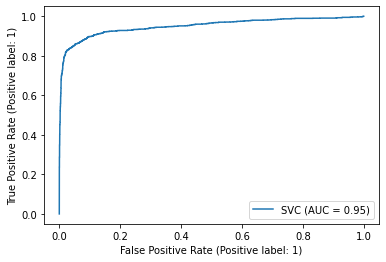

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Mod_svm, X, Y) 

- Log-Loss

In [ ]:
print('Log Loss:', metrics.log_loss(base['type'], base['prediction']))

Log Loss: 2.1796161748029785


# Ejercicio 2.3

* Probar la SVM utilizando los diferentes kernels ('poly', 'rbf', 'sigmoid')
* Evalúe con F1, AUC-ROC y log-loss


In [ ]:
a= [{'kernel' : ['poly', 'rbf', 'sigmoid']}]

In [ ]:
modelos=[]
for i in a[0]["kernel"]:
  mod = svm.SVC(kernel = i)
  modelos.append(mod)
modelos

[SVC(kernel='poly'), SVC(), SVC(kernel='sigmoid')]

In [ ]:
f1=[]
log_l=[]
prediccion=[]
for i in range(0,3,1):
  modelos[i].fit(X,Y)
  prediccion.append(modelos[i].predict(X))
  f1.append(metrics.fbeta_score(base['type'], prediccion[i], beta=1))
  log_l.append(metrics.log_loss(base['type'], prediccion[i]))

In [ ]:
f1

[0.842304060434372, 0.861392832995267, 0.8258736971183324]

El mejor modelo con F1 es el rbf

In [ ]:
log_l

[2.6634013971422967, 2.1796161748029785, 3.0195902208861343]

El mejor modelo con perdida logaritmica es el rbf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


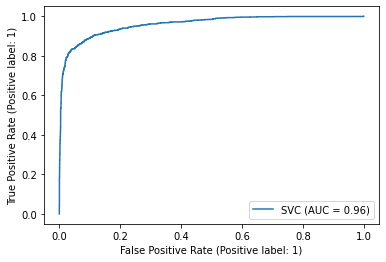

In [ ]:
plot_roc_curve(modelos[0], X, Y) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


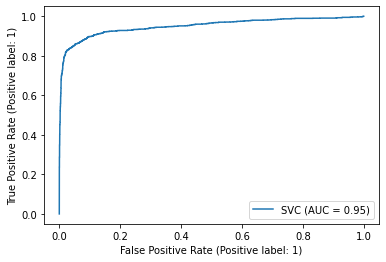

In [ ]:
plot_roc_curve(modelos[1], X, Y) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


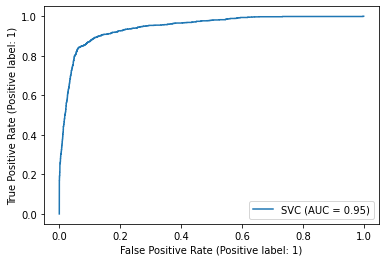

In [ ]:
plot_roc_curve(modelos[2], X, Y) 

Por el AUC, el mejor modelo numericamente el primero por muy poly por una diferencia de 0.01, no muy significativo a criterio personal, por lo que el mejor modelo es el rbf

# Ejercicio 2.4
* Utilizando el mejor SVM del punto anterior encontrar los parámetros que da el mejor rendimiento teniendo en cuenta los siguientes hiperparámetros
'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]
* Evalúe cada modelo con F1, AUC-ROC y log-loss

Nota: Para los valores de C y gamma, deben realizar todas las posibles combinaciones entre estas dos variables.

In [ ]:
hyper = [{'C': [0.1, 1, 10, 100, 1000],
         'gamma': [0.01, 0.001, 0.0001]}]

In [ ]:
mod=[]
for i in hyper[0]["C"]:
  for j in hyper[0]["gamma"]:
    mod.append(svm.SVC(C=i,gamma=j))
mod

[SVC(C=0.1, gamma=0.01),
 SVC(C=0.1, gamma=0.001),
 SVC(C=0.1, gamma=0.0001),
 SVC(C=1, gamma=0.01),
 SVC(C=1, gamma=0.001),
 SVC(C=1, gamma=0.0001),
 SVC(C=10, gamma=0.01),
 SVC(C=10, gamma=0.001),
 SVC(C=10, gamma=0.0001),
 SVC(C=100, gamma=0.01),
 SVC(C=100, gamma=0.001),
 SVC(C=100, gamma=0.0001),
 SVC(C=1000, gamma=0.01),
 SVC(C=1000, gamma=0.001),
 SVC(C=1000, gamma=0.0001)]

In [ ]:
pred=[]
F1=[]
log_l1=[]
auc=[]
for i in range(0,len(mod),1):
  mod[i].fit(X,Y)
  pred.append(mod[i].predict(X))
  F1.append(metrics.fbeta_score(base['type'], pred[i], beta=1))
  log_l1.append(metrics.log_loss(base['type'], pred[i]))
  auc.append(metrics.roc_auc_score(base['type'],pred[i], average = None))

In [ ]:
F1

[0.8606390210740993,
 0.8569500674763831,
 0.8453188602442334,
 0.8989134013829437,
 0.8749580958766342,
 0.8649561107359893,
 0.9667826637140144,
 0.9196225187113569,
 0.8888888888888888,
 0.995293379353624,
 0.9741488020176545,
 0.9371354504212573,
 0.9990610328638497,
 0.989645434577973,
 0.9766266582438408]

In [ ]:
F1 == max(F1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False])

In [ ]:
log_l1

[2.1796151902286454,
 2.2540429664765282,
 2.4241595189494514,
 1.6320552137678912,
 1.9829193109894834,
 2.1264546906192945,
 0.5581958916081661,
 1.313087047096535,
 1.7755899780387436,
 0.0797419185960485,
 0.43592458875030443,
 1.0313306763286616,
 0.01594833449049385,
 0.17543303318513023,
 0.3933948352731154]

In [ ]:
log_l1 ==min(log_l1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False])

In [ ]:
auc

[0.8880120690989239,
 0.8874253661498829,
 0.8791040158571954,
 0.9193772470595264,
 0.9000030260848515,
 0.8921920882053939,
 0.9743278197301243,
 0.9356116177143178,
 0.9105132444200654,
 0.9957307943843015,
 0.9802561370149933,
 0.9479722167105769,
 0.99906191369606,
 0.9919977931286678,
 0.9812834098281618]

In [ ]:
auc == max(auc)

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False])

# Ejercicio 2.5

Compare los resultados con todos los anteriores modelos y eliga ¿Cuál algoritmo con cuáles hiperparámetros es el que tiene mejor rendimiento según la puntuación F1, AUC-ROC y log-loss?

En los 3 criterios, el mejor modelo empleando las 3 puntuaciones, fue el Smv con kernel rbf y C=1000, gamma=0.01